<a href="https://colab.research.google.com/github/charlesm93/stanTutorial/blob/main/CourseScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook contains the code to do the exercises.

The first step is to install the requisite packages to run Stan and do Bayesian analysis.

In [1]:
rm(list = ls())
gc()

set.seed(1954)

used    (Mb) gc trigger (Mb) max used (Mb)
Ncells  632285 33.8 1413014    75.5 1278137  68.3
Vcells 1171610  9.0 8388608    64.0 1815549  13.9

## Install requisite packages

In [2]:
install_packages <- TRUE
if (install_packages) {
  install.packages("rjson")
  install.packages("posterior")
  install.packages("bayesplot")
  install.packages("outbreaks")
  install.packages("loo")
  install.packages("gridExtra")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘checkmate’, ‘tensorA’, ‘distributional’, ‘matrixStats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘ggridges’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (install_packages) {
  install.packages("cmdstanr", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))
  library(cmdstanr)
  install_cmdstan()
}

## Load packages

In [4]:
library(rjson)
library(bayesplot)
library(posterior)
library(ggplot2)
library(cmdstanr)
library(parallel)
library(loo)
library(outbreaks)
library(gridExtra)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

This is posterior version 1.4.1


Attaching package: ‘posterior’


The following object is masked from ‘package:bayesplot’:

    rhat


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


This is loo version 2.6.0

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 



In [5]:
mc.cores = detectCores()

Upload the `tools_is.r` from your computer and then source it.

In [19]:
source("tools_is.r")

In [ ]:
# Silence certain C++ warning messages during compilation
cmdstan_make_local(dir = cmdstan_path(),
                   cpp_options = list(
  "CXXFLAGS += -Wno-deprecated-declarations -Wno-ignored-attributes"
                   ), 
                   append = TRUE)

## Bayesian Linear Regression



In [6]:
data <- list(N = 10,
             x = 1:10,
             y = c(12.03037, 13.86786, 16.00795, 18.29419, 20.26679, 22.38664,
                   23.95751, 25.71993, 28.09961, 30.46859))

# define starting distribution
init <- function() {
  list(sigma = rgamma(1, 1),
       beta = rnorm(1, mean = 1, sd = 1))
}

In [7]:
# transpile (translate Stan to C++ and then compile)
mod <- cmdstan_model("model/linear.stan")

In [ ]:
# run sampler
n_chains <- 4
fit <- mod$sample(data = data, chains = n_chains,
                  init = init,
                  save_warmup = TRUE,
                  parallel_chains = detectCores())


In [15]:
# Examine Stan's default summaries
fit$summary()

variable   mean       median     sd        mad       q5         q95       
1  lp__       -27.138396 -26.811000 1.0618839 0.8005299 -29.263130 -26.113950
2  beta         3.326371   3.331225 0.2344582 0.2198622   2.923175   3.693593
3  sigma        4.447103   4.323165 0.8890540 0.8238141   3.203581   6.104766
4  y_pred[1]    3.377228   3.368165 4.6100374 4.3556193  -4.008635  10.992430
5  y_pred[2]    6.631148   6.704470 4.6577913 4.3151295  -1.086448  14.348205
6  y_pred[3]   10.020917  10.003850 4.5092645 4.2504808   2.397872  17.491775
7  y_pred[4]   13.251412  13.325050 4.5689153 4.3213342   5.547560  20.507415
8  y_pred[5]   16.724166  16.828950 4.6724785 4.4779709   8.871310  24.214635
9  y_pred[6]   19.921790  19.923000 4.7429667 4.4159982  12.272755  27.743090
10 y_pred[7]   23.320258  23.370350 4.8394268 4.6925031  15.604390  31.254250
11 y_pred[8]   26.616017  26.655550 4.9105322 4.6577362  18.280320  34.480575
12 y_pred[9]   29.977642  29.979600 5.0523006 4.8114818  21.625365  38.000730
13 y_pred[10]  33.244245  33.259700 4.9959574 4.8063668  24.966755  41.192005
   rhat      ess_bulk ess_tail
1  1.0027766 1702.620 1914.989
2  1.0015704 1985.931 1548.932
3  1.0030169 2121.046 2115.891
4  1.0003470 3870.787 3805.560
5  1.0001369 3646.452 3426.715
6  1.0002085 3963.914 3808.178
7  0.9994649 3863.694 3836.196
8  1.0000942 3726.579 3775.346
9  1.0000946 3751.279 3825.953
10 1.0000758 3917.586 3906.350
11 0.9993353 3394.613 3361.013
12 1.0003466 3366.506 3451.677
13 0.9999412 3251.349 3240.699

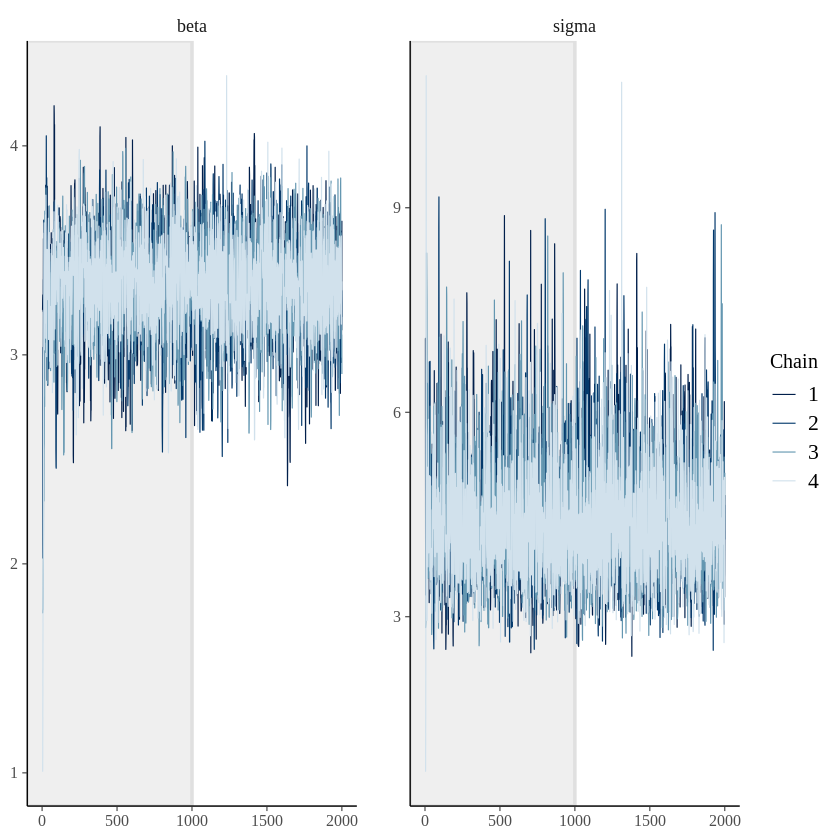

In [16]:
# Construct diagnostic plots
pars <- c("beta", "sigma")
bayesplot::mcmc_trace(fit$draws(inc_warmup = TRUE),
                      n_warmup = 1000, pars = pars)


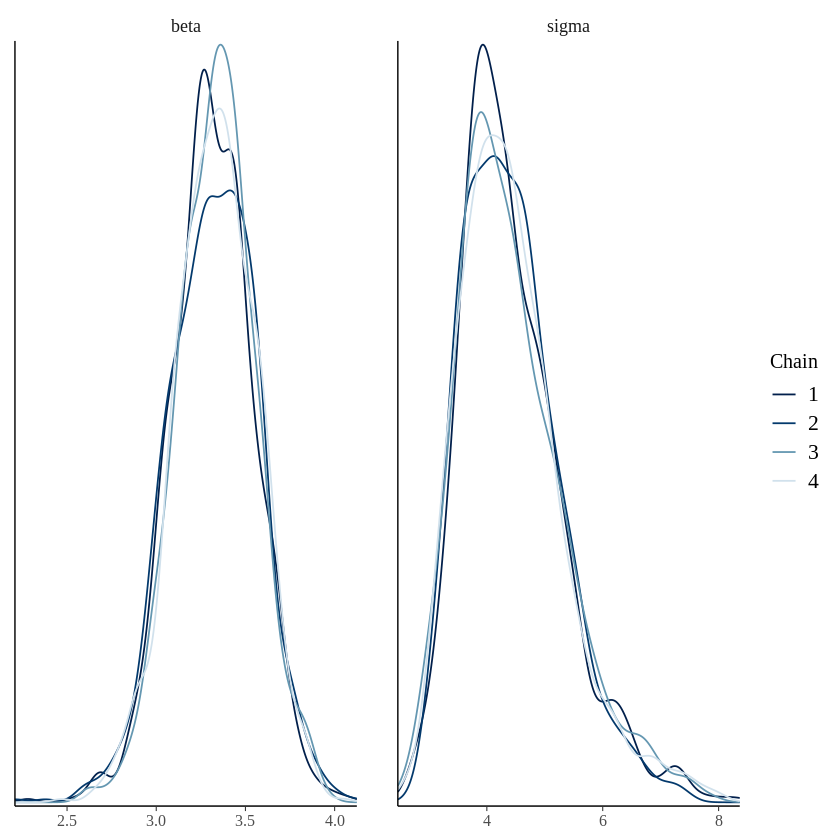

In [21]:
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)

In [22]:
# Extract posterior predictive checks
yrep <- as.matrix(
  as_draws_df(fit$draws(variables = c("y_pred"))))
head(yrep)

y_pred[1] y_pred[2] y_pred[3] y_pred[4] y_pred[5] y_pred[6] y_pred[7]
[1,]  2.508180  6.58403  10.57110   9.46734  20.4269   26.1996   22.4488  
[2,]  7.636070 10.16180   9.39898  14.26680  18.4368   18.5559   18.6609  
[3,] 10.032100  2.35226  15.15430  15.65320  25.9737   20.4695   20.2809  
[4,]  9.500110  2.11312   6.47932  13.44740  17.8165   15.7535   28.0225  
[5,]  0.619144  6.23569  16.01270  11.44530  11.0006   18.5425   22.5011  
[6,] -3.559570  5.99911   6.44170   1.60113  23.7641   22.2031   22.2499  
     y_pred[8] y_pred[9] y_pred[10] .chain .iteration .draw
[1,] 20.0651   33.5489   34.1769    1      1          1    
[2,] 27.6904   31.2208   37.4481    1      2          2    
[3,] 26.3004   25.8428   40.2236    1      3          3    
[4,] 31.6711   33.8193   37.1802    1      4          4    
[5,] 31.8630   29.5887   35.5750    1      5          5    
[6,] 17.8432   30.5847   41.5398    1      6          6

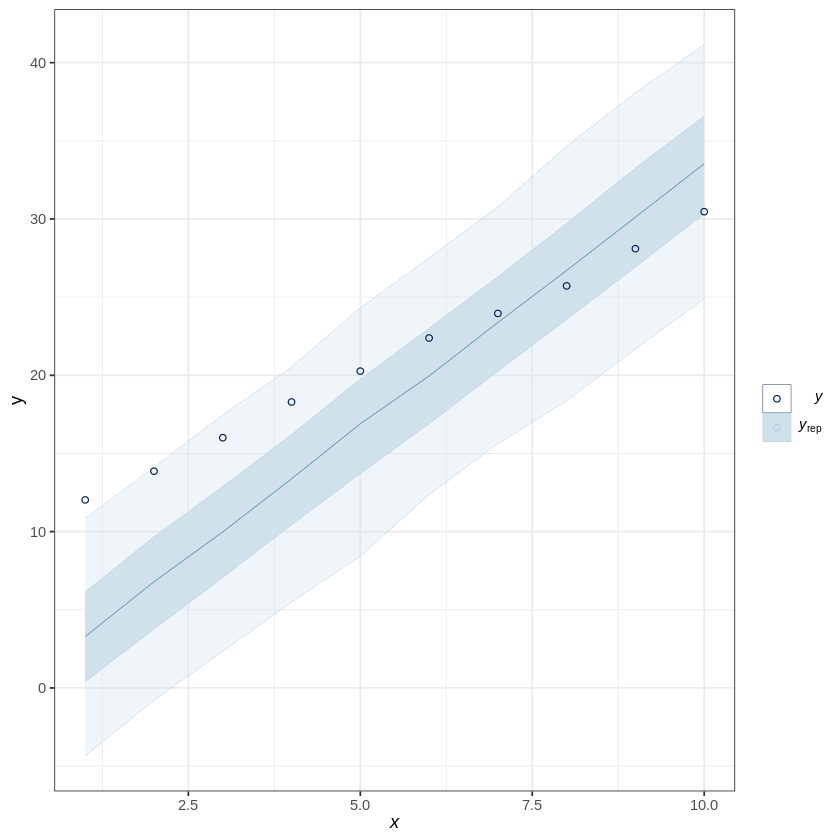

In [23]:
# We don't need the chain, iteration and draw ID, so let's remove them.
yrep <- yrep[, -(11:13)]

# Plot the posterior predictions and compare it to the real data.
bayesplot::ppc_ribbon(y = data$y, yrep = yrep, x = data$x,
                      y_draw = "point") +
  theme_bw() +
  ylab("y")


## SIR model

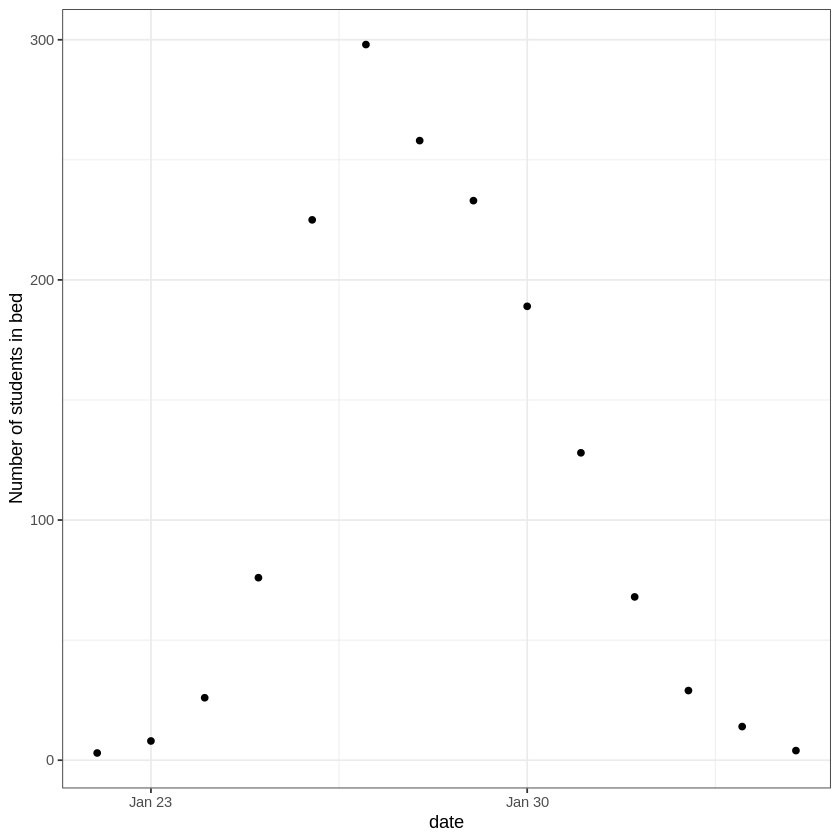

In [32]:
theme_set(theme_bw())
ggplot(data = influenza_england_1978_school) +
  geom_point(mapping = aes(x = date, y = in_bed)) +
  labs(y = "Number of students in bed")


In [33]:
# create a data list to be passed to Stan
cases <- influenza_england_1978_school$in_bed
N <- 763;
n_days <- length(cases)
t <- seq(0, n_days, by = 1)
t0 = 0
t <- t[-1]

#initial conditions
i0 <- 1
s0 <- N - i0
r0 <- 0
y0 = c(S = s0, I = i0, R = r0)

data_sir <- list(n_days = n_days, y0 = y0, t0 = t0, ts = t,
                 N = N, cases = cases)


In [ ]:
# define starting distribution
init <- function() {
  list(beta = abs(rnorm(1, mean = 2, sd = 1)),
       gamma = abs(rnorm(1, mean = 0.4, sd = 0.5)),
       phi_inv = rexp(1, rate = 5))
}

# transpile (translate Stan to C++ and then compile)
mod <- cmdstan_model("model/sir.stan")

n_chains <- 4
fit <- mod$sample(data = data_sir,
                  chains = n_chains,
                  parallel_chains = detectCores(),
                  init = init,
                  save_warmup = TRUE)

variable mean      median    sd         mad        q5        q95       
1 gamma    0.5411385 0.5397915 0.04415096 0.04105245 0.4725459  0.6163206
2 beta     1.7337744 1.7324550 0.05266971 0.05112005 1.6487835  1.8237125
3 phi      9.4677676 8.3285850 5.32607621 4.08710566 3.6100915 19.1905400
4 R0       3.2239479 3.2043600 0.26699041 0.24407303 2.8180680  3.6997815
  rhat     ess_bulk ess_tail
1 1.000822 2558.203 2351.561
2 1.001222 2468.276 2584.206
3 1.001511 2210.330 2396.417
4 1.000409 2459.997 1777.803

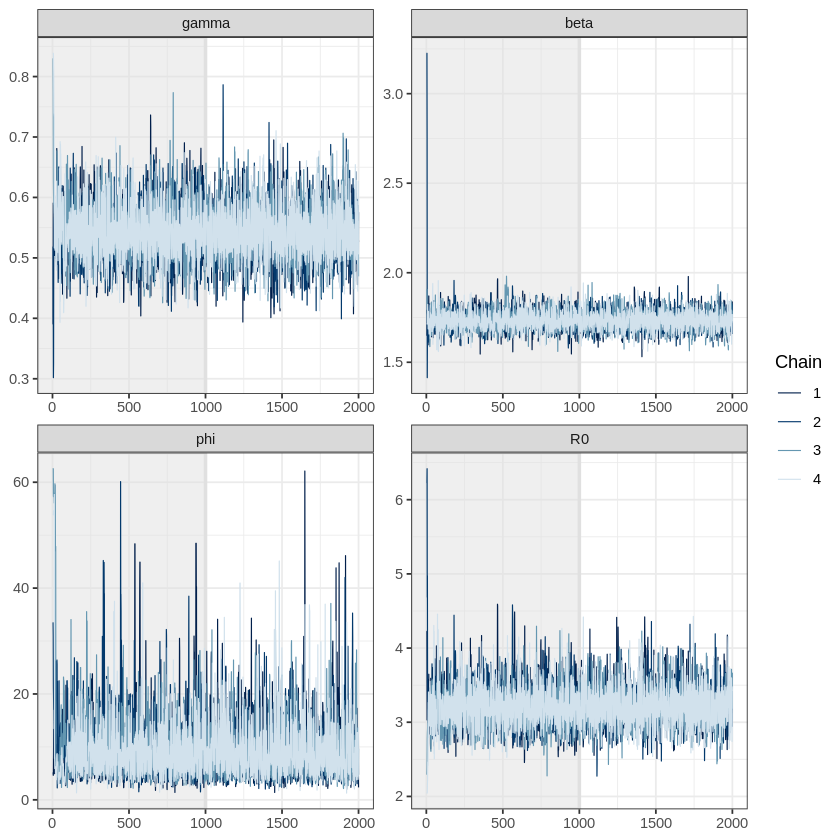

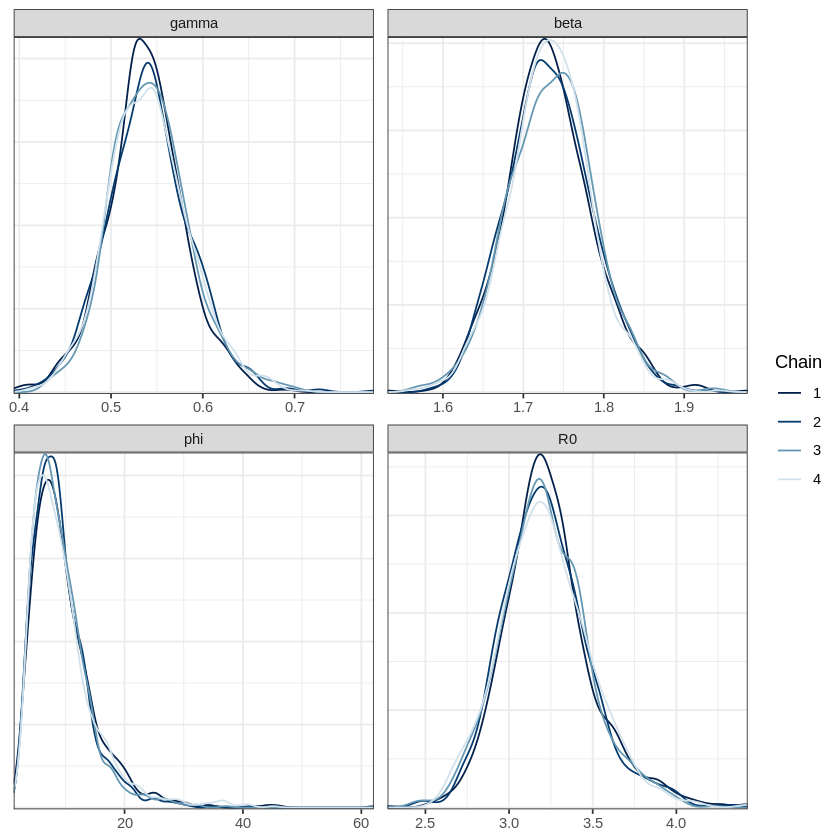

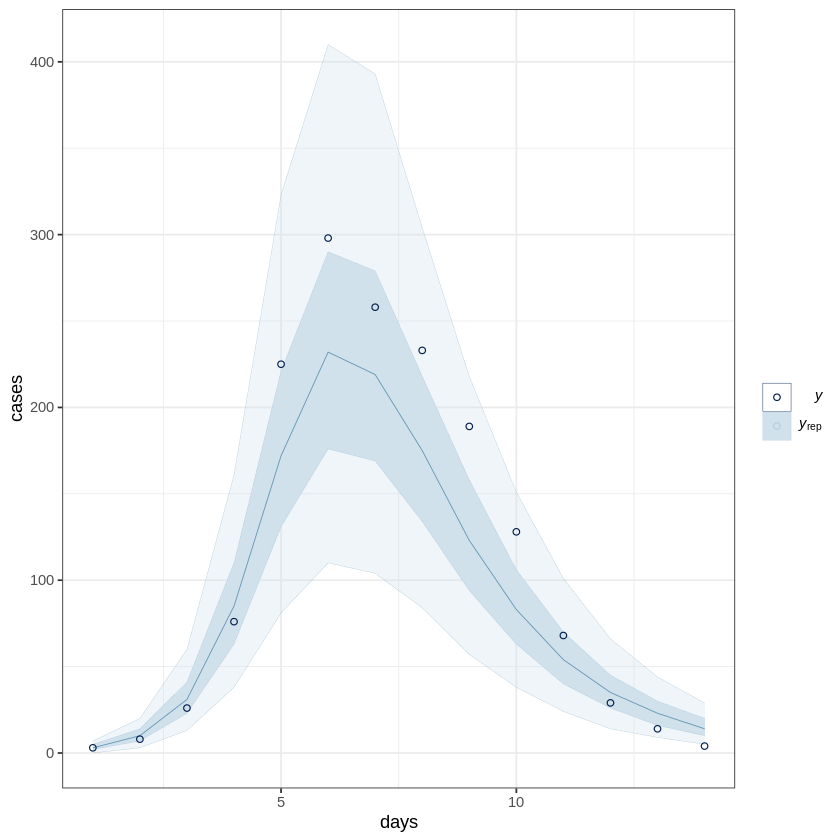

In [38]:
pars <- c("gamma", "beta", "phi", "R0")
fit$summary(variables = pars)

bayesplot::mcmc_trace(fit$draws(inc_warmup = TRUE),
                      n_warmup = 1000, pars = pars)
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)

# Extract posterior predictive checks
pred_cases <- as.matrix(
  as_draws_df(fit$draws(variables = c("pred_cases"))))[, -(15:17)]

bayesplot::ppc_ribbon(y = data_sir$cases, yrep = pred_cases,
                      x = data_sir$ts, y_draw = "point") +
  theme_bw() +
  ylab("cases") + xlab("days")

In [ ]:
## Run same model with a Poisson likelihood

mod <- cmdstan_model("model/sir_poisson.stan")

fit_poisson <- mod$sample(data = data_sir,
                          chains = n_chains,
                          parallel_chains = detectCores(),
                          init = init,
                          save_warmup = TRUE)


variable mean       median   sd           mad        q5        q95        
1 gamma     0.4767401 0.476449   0.01086194 0.01097198 0.4589358   0.4949937
2 beta      1.6899619 1.690110   0.01527682 0.01496685 1.6642130   1.7148130
3 phi      52.9611705 7.223605 609.90796652 6.87903420 1.6872660 110.3744000
4 R0        3.5464545 3.546315   0.07775099 0.07799217 3.4181240   3.6717125
  rhat     ess_bulk ess_tail
1 1.001658 2974.826 2600.127
2 0.999724 3312.999 2711.437
3 1.004043 2402.534 1508.744
4 1.000985 3390.756 2951.582

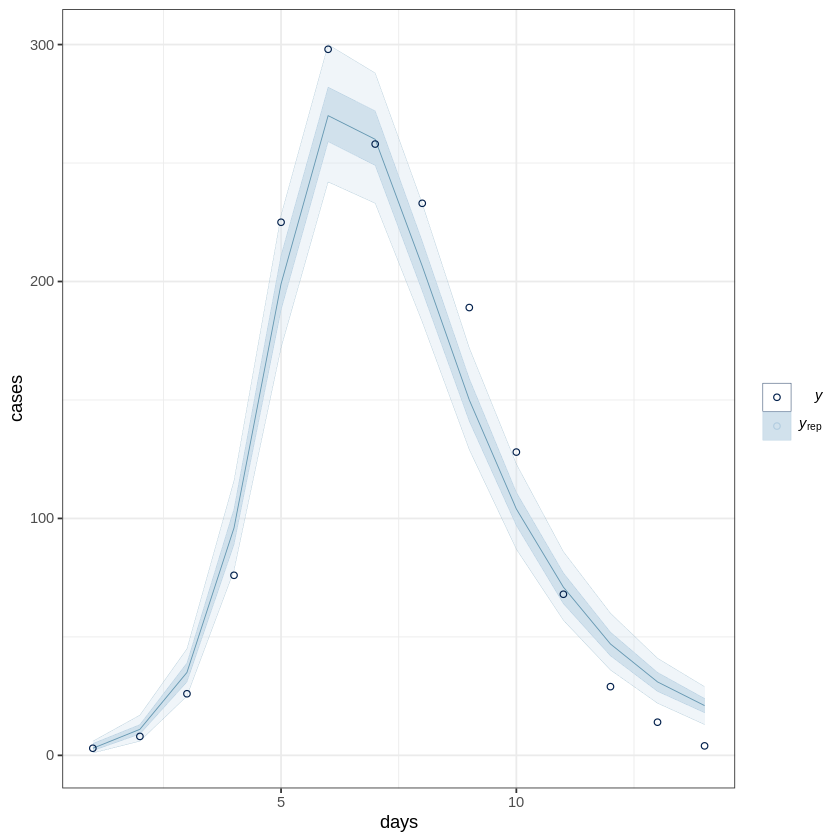

In [40]:
fit_poisson$summary(variables = pars)

pred_cases_poisson <- as.matrix(
  as_draws_df(fit_poisson$draws(variables = c("pred_cases"))))[, -(15:17)]

bayesplot::ppc_ribbon(y = data_sir$cases, yrep = pred_cases_poisson,
                      x = data_sir$ts, y_draw = "point") +
  theme_bw() +
  ylab("cases") + xlab("days")

In [41]:
# compute PSIS-loo estimate

log_lik_draws <- fit$draws("log_lik")
loo_estimate <- loo(log_lik_draws, r_eff = relative_eff(log_lik_draws))


log_lik_draws_poisson <- fit_poisson$draws("log_lik")
loo_estimate_poisson <-
  loo(log_lik_draws_poisson, r_eff = relative_eff(log_lik_draws_poisson))

print(loo_estimate_poisson)
print(loo_estimate)

Warning message:
“Some Pareto k diagnostic values are slightly high. See help('pareto-k-diagnostic') for details.
”
Warning message:
“Some Pareto k diagnostic values are slightly high. See help('pareto-k-diagnostic') for details.
”



Computed from 4000 by 14 log-likelihood matrix

         Estimate   SE
elpd_loo    -82.7 11.0
p_loo         9.2  2.1
looic       165.4 22.0
------
Monte Carlo SE of elpd_loo is 0.1.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     11    78.6%   665       
 (0.5, 0.7]   (ok)        3    21.4%   208       
   (0.7, 1]   (bad)       0     0.0%   <NA>      
   (1, Inf)   (very bad)  0     0.0%   <NA>      

All Pareto k estimates are ok (k < 0.7).
See help('pareto-k-diagnostic') for details.

Computed from 4000 by 14 log-likelihood matrix

         Estimate   SE
elpd_loo    -64.1  5.1
p_loo         2.7  1.1
looic       128.2 10.3
------
Monte Carlo SE of elpd_loo is 0.1.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     12    85.7%   1536      
 (0.5, 0.7]   (ok)        2    14.3%   252       
   (0.7, 1]   (bad)       0     0.0%   <NA>      
   (1, Inf)   (very bad)  0     0.0%   

In [ ]:
## run SIR model with custom tolerance for the ODE solver

mod <- cmdstan_model("model/sir_tol.stan")

tol <- 1e-4
data_sir$tol <- tol
fit_tol <- mod$sample(data = data_sir,
                      chains = n_chains,
                      parallel_chains = detectCores(),
                      init = init,
                      save_warmup = TRUE)


In [45]:
fit_tol$time()

$total
[1] 30.14483

$chains
  chain_id warmup sampling  total
1        1 26.548    1.350 27.898
2        2  1.865    1.313  3.178
3        3  1.704    1.481  3.185
4        4  0.917    0.712  1.629

In [46]:
log_lik <- fit_tol$draws("log_lik")

fit_tol$summary(variables = pars)
loo_estimate <- loo(log_lik, r_eff = relative_eff(log_lik))
print(loo_estimate)

variable mean      median   sd         mad        q5        q95       
1 gamma    0.5417761 0.541004 0.04422384 0.04138085 0.4719091  0.6172962
2 beta     1.7357198 1.733860 0.05393480 0.04972640 1.6518040  1.8257865
3 phi      9.4348936 8.234830 5.22089904 4.05733505 3.6675975 19.1430000
4 R0       3.2244607 3.203645 0.27675521 0.25013686 2.8143155  3.6974110
  rhat     ess_bulk ess_tail
1 1.000248 2761.871 1982.552
2 1.001939 2451.367 1777.642
3 1.000077 2174.473 2334.726
4 1.000311 2661.598 1759.677


Computed from 4000 by 14 log-likelihood matrix

         Estimate   SE
elpd_loo    -64.0  5.1
p_loo         2.6  1.0
looic       128.0 10.3
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.


In [51]:
log_ratios <- fit_tol$draws("log_ratios")

psis_fit <- psis(log_ratios, r_eff =  relative_eff(log_ratios))
psis_fit$diagnostics

# Correct Monte Carlo samplers, using importance weights.
# Only works if the log ratios don't go to 0!
is_summary(fit_tol, pars, psis_fit, log_ratios)


$pareto_k
[1] -0.01239866

$n_eff
log_ratios 
  2482.453

parms mean      var          q5        q25       q50      q75       
1 gamma 0.5417905 4.889732e-07 0.4718414 0.5136478 0.541004  0.5691828
2 beta  1.7357582 7.277240e-07 1.6517088 1.7011279 1.733877  1.7682844
3 phi   9.4313836 6.797869e-03 3.6673513 5.8696472 8.230924 11.6743672
4 R0    3.2244487 1.914929e-05 2.8140334 3.0415283 3.203537  3.3825678
  q95        khat       
1  0.6173308 -0.03656122
2  1.8258811  0.04513222
3 19.1365962  0.07268944
4  3.6974037  0.10406874

## 8 schools

In [52]:
n_schools <- 8
y <- c(28, 8, -3, 7, -1, 1, 18, 12)
sigma <- c(15, 10, 16, 11, 9, 11, 10, 18)

stan_data <- list(n_schools = n_schools,
                  y = y,
                  sigma = sigma)

In [55]:
mod <- cmdstan_model("model/8schools.stan")
# other models: 8schools_nc, 8schools_marginal

fit <- mod$sample(data = stan_data,
                  chains = 4, parallel_chains = detectCores(),
                  iter_warmup = 1000,
                  iter_sampling = 1000,
                  # adapt_delta = 0.8,
                  seed = 1234)

Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
C

See https://mc-stan.org/misc/warnings for details.




In [56]:
fit$summary()

variable mean       median     sd       mad      q5          q95      
1  lp__     -15.924647 -16.192200 5.554420 5.978585 -24.8222300 -6.346908
2  mu         5.844511   5.861560 2.599231 2.698784   1.7460345 10.102900
3  tau        4.796793   3.945525 3.468523 3.109168   0.8814465 11.633115
4  theta[1]   8.285251   7.507895 6.044834 4.853202   0.3404072 19.573940
5  theta[2]   6.268803   6.164755 5.062666 4.482693  -1.2990600 14.418350
6  theta[3]   5.030884   5.328775 5.578172 4.636439  -4.8451985 13.310255
7  theta[4]   6.088126   5.990055 5.133998 4.510536  -1.7899965 14.646810
8  theta[5]   4.254768   4.652550 4.974220 4.343418  -4.3644560 11.796010
9  theta[6]   5.008420   5.190615 5.032149 4.452233  -3.6101010 12.710950
10 theta[7]   8.258546   7.680955 5.409460 4.527127   0.8775786 18.480585
11 theta[8]   6.419982   6.281840 5.617110 4.699116  -2.1142855 15.878760
   rhat     ess_bulk  ess_tail  
1  1.019375  174.9575  116.89869
2  1.004449  706.8614  786.20211
3  1.022109  170.8084   54.87639
4  1.006053  853.9936 1449.07075
5  1.005741 1721.2704 1641.47035
6  1.002132 1725.8975 1850.41863
7  1.004459 1443.1973 1736.55481
8  1.004143 1182.6307 1141.74608
9  1.001615 1297.2177 1918.02207
10 1.004809  700.6128 1696.16975
11 1.004975 1748.8473 1781.43851

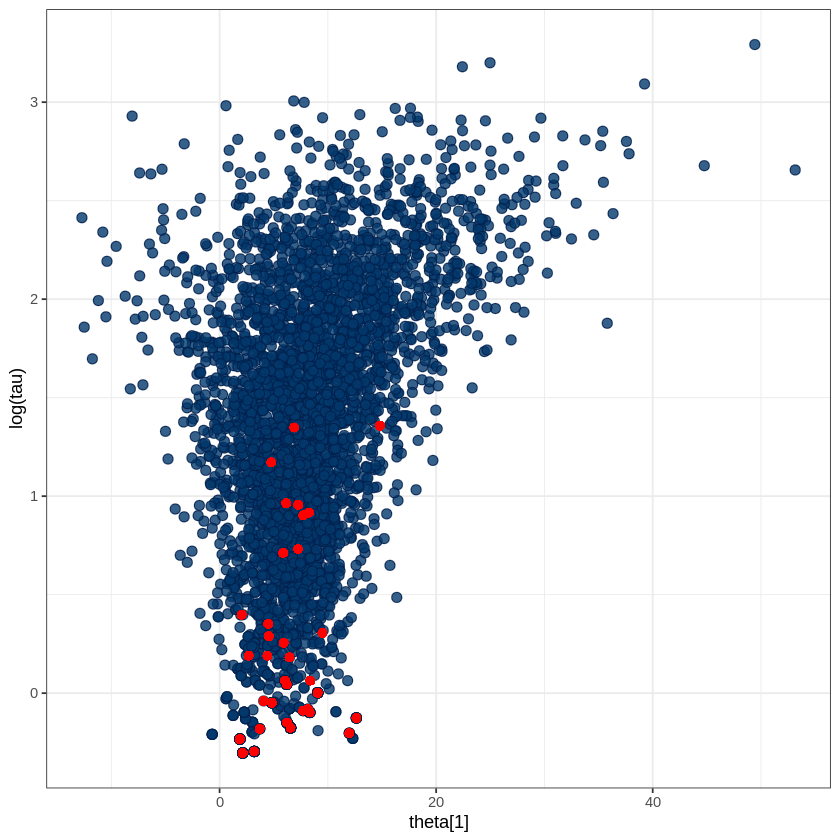

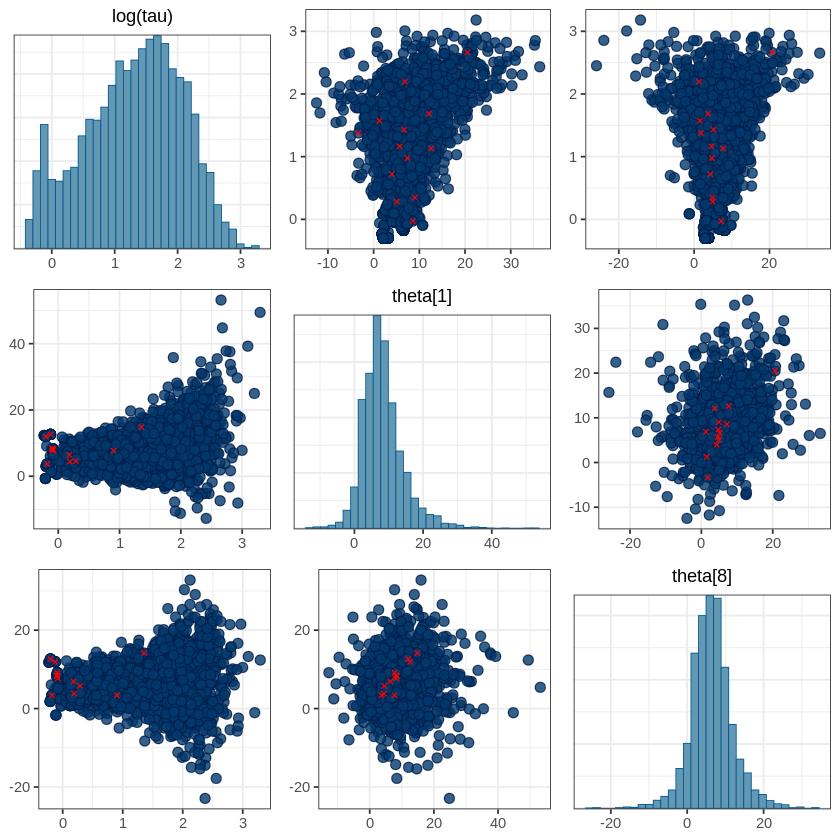

In [60]:
mcmc_draws <- fit$draws()

# plot log tau against theta to identify divergent transitions
np <- nuts_params(fit)
mcmc_scatter(mcmc_draws, pars = c("theta[1]", "tau"),
             transform = list(tau = "log"), np = np)

mcmc_pairs(mcmc_draws, pars = "tau", regex_pars = "theta\\[[1,8]\\]",
           transform = list(tau = "log"), np = np)


## Disease map of Finland

Upload `disease_100.json` and added it to the `data` folder (you may need to create this folder).

In [61]:
data <- fromJSON(file = "data/disease_100.json")

In [63]:
mod <- cmdstan_model("model/disease_map.stan")

fit <- mod$sample(data = data,
                  chains = 4, parallel_chains = detectCores(),
                  iter_warmup = 500,
                  iter_sampling = 500,
                  adapt_delta = 0.8,
                  seed = 1234)

Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: cholesky_decompose: Matrix m is not positive definite (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 27, column 5 to column 41)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then y

Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 69.9 seconds.
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 90.5 seconds.
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gp_exp_quad_cov: sigma is 0, but must be positive! (in '/tmp/RtmpEIIU9b/model-3be6ac5c527.stan', line 25, column 5 to column 44)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your

Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 82.8 seconds.
Chain 4 Iteration: 800 / 1000 [ 80%

See https://mc-stan.org/misc/warnings for details.




In [64]:
pars <- c("alpha", "rho", "theta[1]")
fit$summary(variables = pars)

variable mean       median     sd          mad        q5         q95        
1 alpha     0.7274650  0.6934200  0.21171273 0.18798997  0.4520429  1.10562850
2 rho      20.8789666 17.9398000 12.04491919 6.39297120 10.4224700 40.47238000
3 theta[1] -0.0917402 -0.0913263  0.02453251 0.02253085 -0.1323685 -0.05358334
  rhat     ess_bulk  ess_tail
1 1.003168  631.1588 645.7613
2 1.004511  227.5315 267.8509
3 1.001341 1089.0466 491.7099

## Pharmacokinetic model

In [6]:
# Download Torsten
system("git clone https://github.com/metrumresearchgroup/Torsten.git")

To build the Stan binaries with `Torsten`, we can open a shell window (bottom left icon on Colab) and type the following commands:
```
cd Torsten/cmdstan
make examples/TwoCptModelPopulation/TwoCptModelPopulation
```

In [7]:
# Make cmdstanr use Torsten
cmdstan_path <- "Torsten/cmdstan/"
set_cmdstan_path(cmdstan_path)
bayesplot::color_scheme_set("mix-blue-green")


CmdStan path set to: /content/Torsten/cmdstan



In [ ]:
# Silence certain C++ warning messages during compilation
cmdstan_make_local(dir = cmdstan_path(),
                   cpp_options = list(
  "CXXFLAGS += -Wno-deprecated-declarations -Wno-ignored-attributes"
                   ), 
                   append = TRUE)

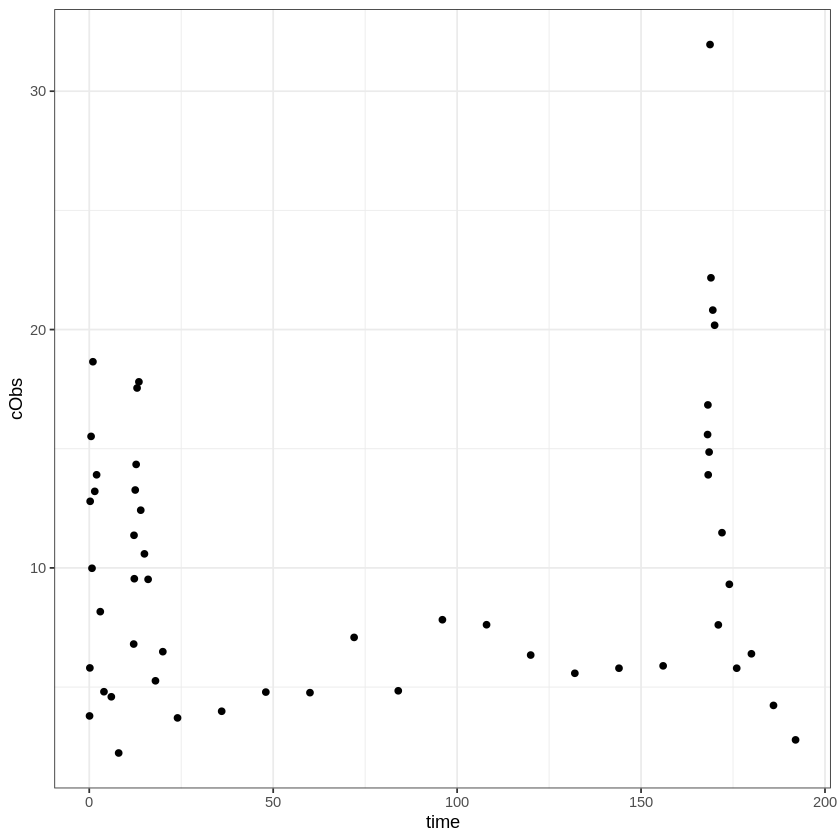

In [23]:
data <- fromJSON(file = "data/twoCpt.data.json")

# Plot drug concentration profile
p <- ggplot(data = data.frame(time = data$time[-1],
                              cObs = data$cObs),
            aes(x = time, y = cObs)) +
  geom_point() +
  theme_bw()
p

In [24]:
# Draw initial conditions from the prior
init <- function() {
  list(CL = exp(rnorm(1, log(10), 0.25)),
       Q = exp(rnorm(1, log(15), 0.5)),
       VC = exp(rnorm(1, log(35), 0.25)),
       VP = exp(rnorm(1, log(105), 0.5)),
       ka = exp(rnorm(1, log(2), 1)),
       sigma = abs(rnorm(1, 0, 1)))
}

In [29]:
model_name <- "twoCpt_ode"
mod <- cmdstan_model(paste0("model/", model_name, ".stan"))


In file included from stan/lib/stan_math/lib/boost_1.75.0/boost/concept/assert.hpp:35,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/concept_check.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/concepts.hpp:19,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/size_type.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/size.hpp:21,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/functions.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/iterator_range_core.hpp:38,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/lexical_cast.hpp:30,
                 from stan/lib/stan_math/stan/math/prim/core/init_threadpool_tbb.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/core.hpp:4,
                 from stan/lib/stan_math/stan/math/rev/core/Eigen_NumTraits.hpp:5,
                 from stan/lib/stan_math/stan/math/rev/core

In [30]:
n_chains <- 4
fit <- mod$sample(data = data, chains = n_chains, init = init,
                  parallel_chains = detectCores(),
                  iter_warmup = 500, iter_sampling = 500)

Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your m

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 63.5 seconds.
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: PMX Variadic ODE System: initial state[2] is -nan, but must be finite! (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: twoCpt_ode_model_namespace::log_prob: mass[2, 31] is -0.000132514, but must be greater than or equal to 0.000000 (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 62, column 2 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covarianc

Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 71.6 seconds.
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your m

Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: Max number of iterations exceeded (1000). (in '/tmp/RtmpBMyYdw/model-184279792a.stan', line 68, column 2 to line 70, column 57)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your m

Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 59.4 seconds.
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 59.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 63.5 seconds.
Total execut

In [32]:
# Save fit (useful for expensive models!)
system("mkdir deliv")
fit$save_object(paste0("deliv/", model_name, ".fit.RDS"))

In [33]:
fit$time()

$total
[1] 131.5456

$chains
  chain_id warmup sampling  total
1        1 33.622   37.994 71.616
2        2 32.354   31.138 63.492
3        3 30.657   28.700 59.357
4        4 33.407   26.139 59.546

variable mean        median     sd          mad         q5        
1 CL        10.0309258  10.024750  0.36418706  0.35834442  9.4237980
2 Q         19.8521506  19.633400  3.79950699  3.67217781 13.9817800
3 VC        41.3445925  41.294050  9.48150686  9.86173629 26.1769350
4 VP       124.2476102 122.884000 17.59296156 16.13661840 98.4627500
5 ka         1.7367079   1.691175  0.50677609  0.48932472  1.0184020
6 sigma      0.2226211   0.221324  0.02285144  0.02209074  0.1872614
  q95         rhat      ess_bulk  ess_tail 
1  10.6202450 1.0020675 1550.6839 1146.2044
2  26.5210750 0.9996965 1006.2145 1138.3151
3  57.1292850 1.0029765  925.7243  994.7898
4 155.0227000 1.0012904 1826.3391 1457.3077
5   2.6844735 1.0035604  932.4742  965.7682
6   0.2616931 1.0056657 1577.6325 1175.9792

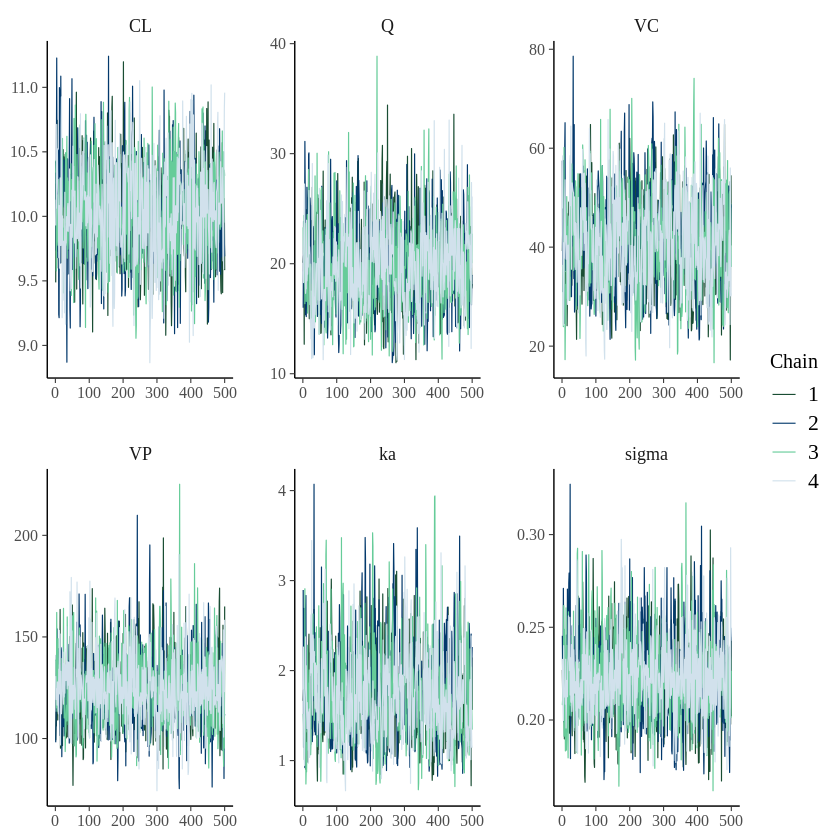

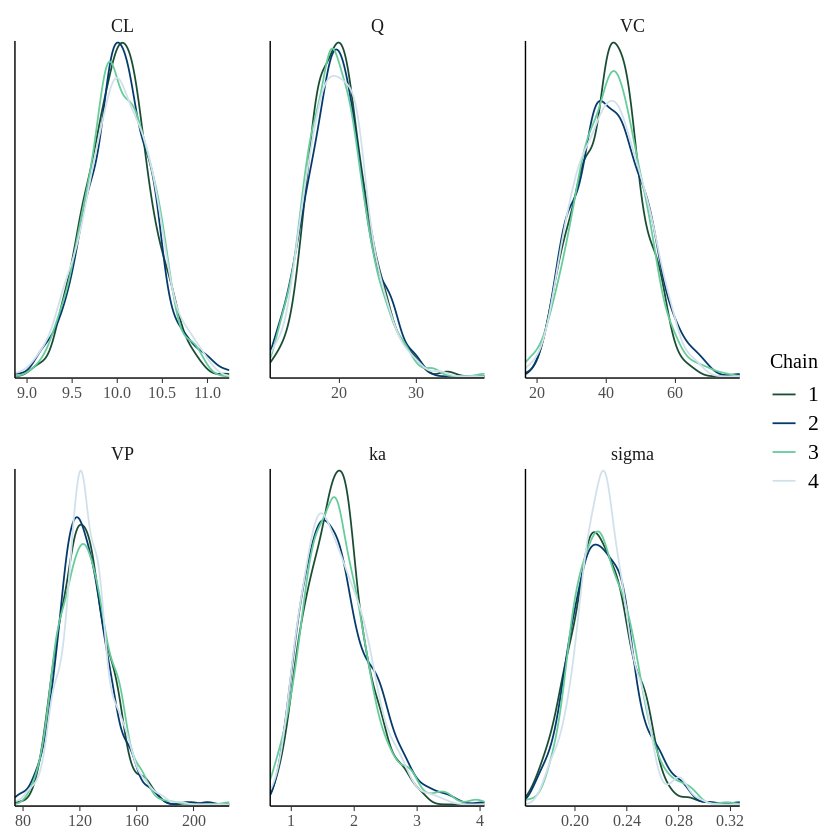

In [34]:
pars = c("CL", "Q", "VC", "VP", "ka", "sigma")
fit$summary(variables = pars)

bayesplot::mcmc_trace(fit$draws(), pars = pars)
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)


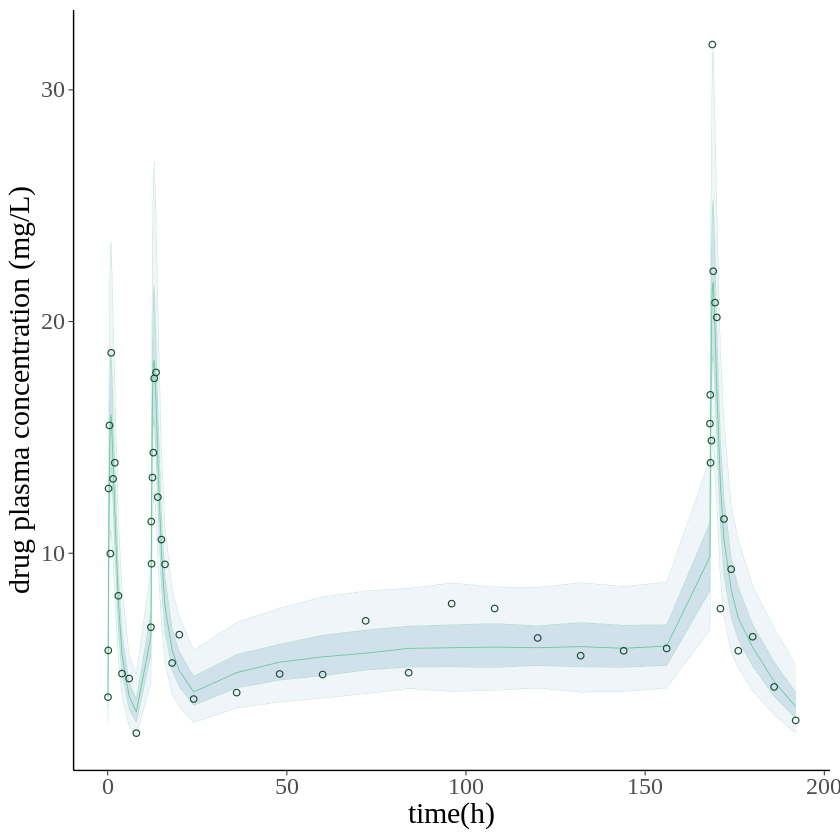

In [35]:
# posterior predictive checks
yrep <- as.matrix(
  as_draws_df(
    fit$draws(variables = c("concentrationObsPred"))
  ))[, -(52:54)]

yobs <- data$cObs
time <- data$time[-1]

p <- bayesplot::ppc_ribbon(y = yobs, yrep = yrep,
                           x = time, y_draw = "point") +
  xlab("time(h)") + ylab("drug plasma concentration (mg/L)") +
  theme(legend.position = "none") +
  theme(text = element_text(size = 18))
p

In [38]:
# PSIS check for ODE tolerance
log_ratios <- fit$draws("log_ratios")

psis_fit <- psis(log_ratios, r_eff =  relative_eff(log_ratios))
psis_fit$diagnostics

$pareto_k
[1] 0.2984183

$n_eff
log_ratios 
  1879.529

In [39]:
## Use built-in analytical solution

# two compartment model
mod <- cmdstan_model("model/twoCpt.stan")
fit <- mod$sample(data = data, chains = n_chains, init = init,
                  parallel_chains = detectCores(),
                  iter_warmup = 500, iter_sampling = 500)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: PMXTwoCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: twoCpt_model_namespace::log_prob: mass[1, 1] is -nan, but must be greater than or equal to 0.000000 (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the 

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: twoCpt_model_namespace::log_prob: mass[1, 1] is -nan, but must be greater than or equal to 0.000000 (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: PMXTwoCptModel: CL is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: twoCpt_model_namespace::log_prob: mass[1, 1] is -nan, but must be greater than or equal to 0.000000 (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then th

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: twoCpt_model_namespace::log_prob: mass[1, 1] is -nan, but must be greater than or equal to 0.000000 (in '/tmp/RtmpBMyYdw/model-1841607565.stan', line 37, column 2 to line 38, column 77)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]

$total
[1] 30.8023

$chains
  chain_id warmup sampling  total
1        1 17.073   12.456 29.529
2        2 17.830   12.877 30.707
3        3 18.704   11.629 30.333
4        4 16.809   12.883 29.692

variable    mean         median       sd           mad         
1   lp__          -2.4720300   -2.1465100   1.81712141   1.67157220
2   CL            10.0202700   10.0143500   0.36253388   0.36374850
3   Q             19.6706646   19.4208000   3.98702071   3.91821528
4   VC            41.7780950   41.5662500   9.52240140   9.90065454
5   VP           123.1993155  122.3305000  18.38404998  17.83419540
6   ka             1.7623776    1.7113500   0.51378895   0.50777567
7   sigma          0.2240772    0.2214015   0.02462602   0.02295584
8   theta[1]      10.0202700   10.0143500   0.36253388   0.36374850
9   theta[2]      19.6706646   19.4208000   3.98702071   3.91821528
10  theta[3]      41.7780950   41.5662500   9.52240140   9.90065454
11  theta[4]     123.1993155  122.3305000  18.38404998  17.83419540
12  theta[5]       1.7623776    1.7113500   0.51378895   0.50777567
13  mass[1,1]   1250.0000000 1250.0000000   0.00000000   0.00000000
14  mass[2,1]      0.0000000    0.0000000   0.00000000   0.00000000
15  mass[3,1]      0.0000000    0.0000000   0.00000000   0.00000000
16  mass[1,2]   1080.8699035 1084.4800000  45.44791159  45.85681800
17  mass[2,2]    164.1728632  160.3115000  45.49147874  46.14370110
18  mass[3,2]      3.2754722    3.1976350   0.70173484   0.65522024
19  mass[1,3]    934.6667290  939.2700000  78.04621254  80.35024830
20  mass[2,3]    296.6730970  291.1285000  78.36772996  80.87138220
21  mass[3,3]     12.3103056   12.0351500   2.60034018   2.41485888
22  mass[1,4]    811.0373940  814.8965000 100.18497718 104.54776290
23  mass[2,4]    400.0014895  394.4150000 101.15559461 106.08151260
24  mass[3,4]     25.6610158   25.1355000   5.34860122   4.98590967
25  mass[1,5]    534.2509045  531.2450000 128.05129746 137.85363060
26  mass[2,5]    588.9938875  590.4315000 133.68148260 143.12798010
27  mass[3,5]     83.0378475   81.7947000  16.66514111  15.96270942
28  mass[1,6]    356.8597507  346.3275000 125.32113710 134.57115420
29  mass[2,6]    658.9836880  666.1555000 139.15209530 151.32972330
30  mass[3,6]    152.4780927  150.9400000  29.50781429  28.65421020
⋮   ⋮           ⋮            ⋮            ⋮            ⋮           
293 log_lik[22] -2.1513283   -2.1071250   0.2977300    0.2718792   
294 log_lik[23] -1.2230253   -1.1916350   0.1881849    0.1582082   
295 log_lik[24] -2.1265410   -2.0430050   0.4937068    0.4453953   
296 log_lik[25] -0.8456499   -0.8248200   0.1603005    0.1473504   
297 log_lik[26] -1.2124007   -1.1922400   0.2368145    0.2444511   
298 log_lik[27] -1.1173970   -1.1040100   0.1414300    0.1340863   
299 log_lik[28] -1.2556414   -1.2362800   0.1704125    0.1618332   
300 log_lik[29] -1.8642367   -1.8402500   0.2219565    0.2009516   
301 log_lik[30] -1.3698413   -1.3512900   0.1932751    0.1851545   
302 log_lik[31] -2.3452694   -2.3118550   0.3111828    0.2876763   
303 log_lik[32] -2.1372831   -2.1076450   0.2749581    0.2583949   
304 log_lik[33] -1.3392269   -1.3313750   0.1279966    0.1280818   
305 log_lik[34] -1.2048619   -1.1954900   0.1240797    0.1196681   
306 log_lik[35] -1.2091639   -1.2010300   0.1151746    0.1128555   
307 log_lik[36] -1.2201289   -1.2132000   0.1136936    0.1144938   
308 log_lik[37] -4.3800694   -4.3281200   0.5690240    0.5789331   
309 log_lik[38] -2.9689044   -2.9507200   0.2695994    0.2730208   
310 log_lik[39] -2.1847804   -2.1742300   0.1397664    0.1354652   
311 log_lik[40] -3.0220748   -2.9849350   0.2790702    0.2545179   
312 log_lik[41] -4.4889028   -4.4512600   0.4102760    0.3904279   
313 log_lik[42] -2.5413818   -2.5356150   0.1113671    0.1083188   
314 log_lik[43] -2.5083423   -2.4998700   0.1205879    0.1137228   
315 log_lik[44] -2.7246352   -2.7017500   0.1932144    0.1860811   
316 log_lik[45] -4.4510376   -4.3965950   0.8093288    0.8092624   
317 log_lik[46] -1.9539524   -1.9445600   0.1304458    0.1302686   
318 log_lik[47] -1.7926582   -1.7838900   0.1331009    0.1284895   
319 log_lik[48] -1.7467223   -1.7230500   0.2206949    0.207

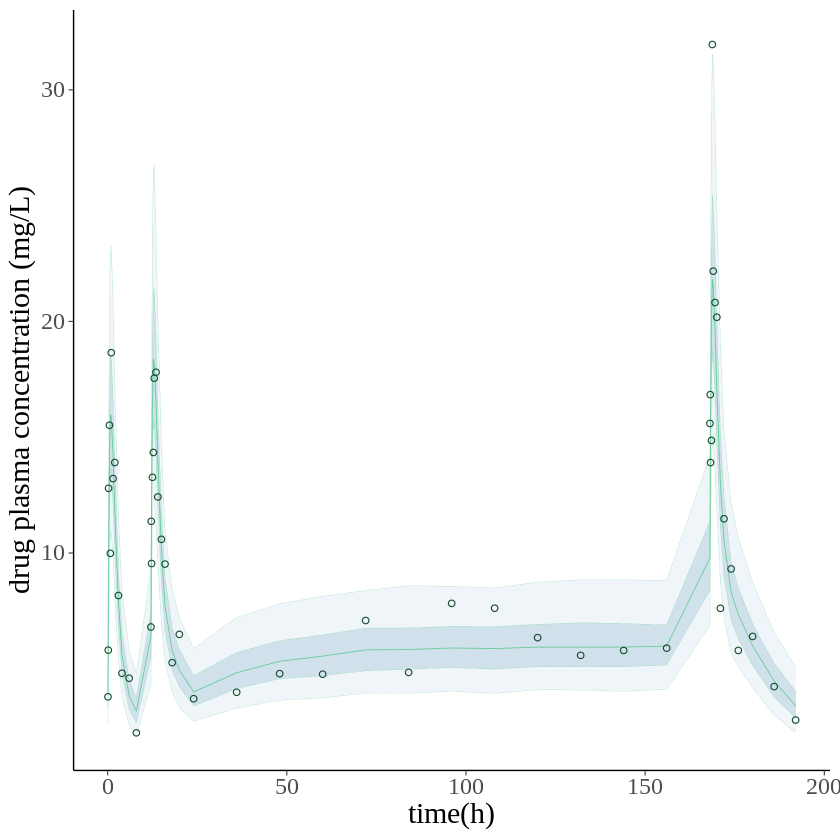

In [40]:
fit$time()
fit$summary()

yrep <- as.matrix(
  as_draws_df(
    fit$draws(variables = c("concentrationObsPred"))
  ))[, -(52:54)]

yobs <- data$cObs
time <- data$time[-1]

p <- bayesplot::ppc_ribbon(y = yobs, yrep = yrep,
                           x = time, y_draw = "point") +
  xlab("time(h)") + ylab("drug plasma concentration (mg/L)") +
  theme(legend.position = "none") +
  theme(text = element_text(size = 18))
p

In [41]:
# one compartment model
mod <- cmdstan_model("model/oneCpt.stan")
fit_one <- mod$sample(data = data, chains = n_chains, init = init,
                      parallel_chains = n_chains,
                      iter_warmup = 500, iter_sampling = 500)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: PMXOneCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 34, column 2 to line 35, column 77)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: PMXOneCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 34, column 2 to line 35, column 77)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warnin

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: PMXOneCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 34, column 2 to line 35, column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: PMXOneCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 34, column 2 to line 35, column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warnin

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: PMXOneCptModel: CL is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 34, column 2 to line 35, column 77)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[3] is -inf, but must be finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 48, column 2 to column 52)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this 

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lognormal_lpdf: Location parameter[1] is -inf, but must be finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 48, column 2 to column 52)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lognormal_lpdf: Location parameter[1] is -inf, but must be finite! (in '/tmp/RtmpBMyYdw/model-184400971b4.stan', line 48, column 2 to column 52)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iterat

$total
[1] 7.697161

$chains
  chain_id warmup sampling total
1        1  4.399    3.053 7.452
2        2  4.253    3.096 7.349
3        3  4.089    3.372 7.461
4        4  3.566    3.374 6.940

variable    mean          median        sd           mad         
1   lp__        -2.839396e+01 -2.808435e+01   1.49381685 1.314844e+00
2   CL           9.582531e+00  9.581525e+00   0.47230334 4.583977e-01
3   VC           9.451366e+01  9.449900e+01   8.55938049 8.368684e+00
4   ka           5.124716e+00  4.869985e+00   1.34272952 1.211588e+00
5   sigma        3.385905e-01  3.353185e-01   0.03797245 3.600272e-02
6   theta[1]     9.582531e+00  9.581525e+00   0.47230334 4.583977e-01
7   theta[2]     9.451366e+01  9.449900e+01   8.55938049 8.368684e+00
8   theta[3]     5.124716e+00  4.869985e+00   1.34272952 1.211588e+00
9   mass[1,1]    1.250000e+03  1.250000e+03   0.00000000 0.000000e+00
10  mass[2,1]    0.000000e+00  0.000000e+00   0.00000000 0.000000e+00
11  mass[1,2]    8.218296e+02  8.343810e+02  87.08096896 8.454601e+01
12  mass[2,2]    4.262407e+02  4.137435e+02  86.70448464 8.427321e+01
13  mass[1,3]    5.437405e+02  5.542480e+02 111.22494399 1.143455e+02
14  mass[2,3]    6.994434e+02  6.890155e+02 110.11580495 1.134915e+02
15  mass[1,4]    3.652093e+02  3.699630e+02 108.22434599 1.139667e+02
16  mass[2,4]    8.712987e+02  8.666610e+02 106.38268687 1.120697e+02
17  mass[1,5]    1.160676e+02  1.094985e+02  64.71461238 6.491030e+01
18  mass[2,5]    1.094801e+03  1.101570e+03  61.55445415 6.155755e+01
19  mass[1,6]    3.940265e+01  3.240820e+01  32.36888667 2.767962e+01
20  mass[2,6]    1.142795e+03  1.149555e+03  29.36170137 2.387727e+01
21  mass[1,7]    1.412606e+01  9.591870e+00  15.71533480 1.014646e+01
22  mass[2,7]    1.138951e+03  1.141620e+03  14.45572269 1.016322e+01
23  mass[1,8]    2.079832e+00  8.402335e-01   3.87605948 1.122776e+00
24  mass[2,8]    1.094016e+03  1.094390e+03  10.64169284 1.047457e+01
25  mass[1,9]    3.571151e-01  7.360320e-02   1.06981281 1.060256e-01
26  mass[2,9]    1.041338e+03  1.041595e+03  13.64200379 1.348425e+01
27  mass[1,10]   1.547362e-02  5.647935e-04   0.10886203 8.362142e-04
28  mass[2,10]   9.408074e+02  9.412415e+02  19.33387560 1.930049e+01
29  mass[1,11]   1.017168e-03  4.333945e-06   0.01357775 6.425083e-06
30  mass[2,11]   8.497616e+02  8.503395e+02  23.97241269 2.426720e+01
⋮   ⋮           ⋮             ⋮             ⋮            ⋮           
237 log_lik[22] -2.281211     -2.271770     0.1438979    0.1453467   
238 log_lik[23] -3.081303     -3.053305     0.3139481    0.3049189   
239 log_lik[24] -1.855569     -1.849475     0.1251103    0.1268438   
240 log_lik[25] -1.655486     -1.638765     0.1836642    0.1742203   
241 log_lik[26] -1.712197     -1.693235     0.1991099    0.1884978   
242 log_lik[27] -1.535481     -1.524915     0.1353364    0.1325815   
243 log_lik[28] -1.547383     -1.537095     0.1399764    0.1369255   
244 log_lik[29] -2.036284     -2.021135     0.1633673    0.1555692   
245 log_lik[30] -1.543243     -1.533210     0.1366423    0.1327001   
246 log_lik[31] -2.379574     -2.358175     0.2142671    0.2029383   
247 log_lik[32] -2.276618     -2.256805     0.1985775    0.1872820   
248 log_lik[33] -1.757585     -1.749425     0.1290089    0.1253464   
249 log_lik[34] -1.573648     -1.571220     0.1159120    0.1130557   
250 log_lik[35] -1.611802     -1.609245     0.1167249    0.1134486   
251 log_lik[36] -1.633247     -1.629980     0.1179129    0.1145086   
252 log_lik[37] -3.457834     -3.426345     0.3347637    0.3327103   
253 log_lik[38] -2.994139     -2.971530     0.1975866    0.1917817   
254 log_lik[39] -2.499101     -2.492985     0.1192947    0.1144567   
255 log_lik[40] -2.621273     -2.614080     0.1246995    0.1211062   
256 log_lik[41] -4.992185     -4.940000     0.4469414    0.4418963   
257 log_lik[42] -3.236448     -3.226565     0.1262990    0.1161172   
258 log_lik[43] -3.130502     -3.123885     0.1202121    0.1110097   
259 log_lik[44] -3.140324     -3.131800     0.1257921    0.1166584   
260 log_lik[45] -3.610764     -3.580105     0.3433372    0.3295301   
261 log_lik[46] -2.334320     -2.328450     0.1228569    0.1249609   
262 log_lik[47

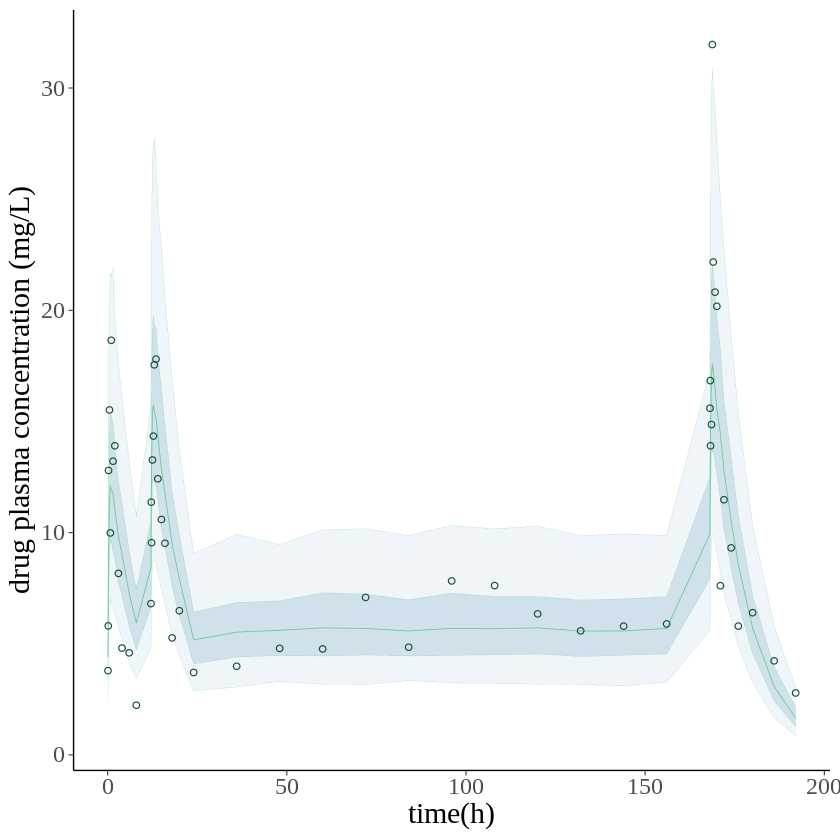

In [42]:
fit_one$time()
fit_one$summary()

yrep <- as.matrix(
  as_draws_df(
    fit_one$draws(variables = c("concentrationObsPred"))
  ))[, -(52:54)]

yobs <- data$cObs
time <- data$time[-1]

p <- bayesplot::ppc_ribbon(y = yobs, yrep = yrep,
                           x = time, y_draw = "point") +
  xlab("time(h)") + ylab("drug plasma concentration (mg/L)") +
  theme(legend.position = "none") +
  theme(text = element_text(size = 18))
p


In [43]:
# estimate ELPD_loo for both models
log_lik_draws <- fit$draws("log_lik")
loo_estimate <- loo(log_lik_draws, r_eff = relative_eff(log_lik_draws))


log_lik_draws_one <- fit_one$draws("log_lik")
loo_estimate_one <-
  loo(log_lik_draws_one, r_eff = relative_eff(log_lik_draws_one))

print(loo_estimate_one)
print(loo_estimate)

Warning message:
“Some Pareto k diagnostic values are slightly high. See help('pareto-k-diagnostic') for details.
”



Computed from 2000 by 51 log-likelihood matrix

         Estimate   SE
elpd_loo   -128.2  5.8
p_loo         3.6  0.9
looic       256.4 11.7
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

Computed from 2000 by 51 log-likelihood matrix

         Estimate   SE
elpd_loo   -107.9  6.6
p_loo         4.8  1.0
looic       215.8 13.3
------
Monte Carlo SE of elpd_loo is 0.1.

Pareto k diagnostic values:
                         Count Pct.    Min. n_eff
(-Inf, 0.5]   (good)     50    98.0%   642       
 (0.5, 0.7]   (ok)        1     2.0%   820       
   (0.7, 1]   (bad)       0     0.0%   <NA>      
   (1, Inf)   (very bad)  0     0.0%   <NA>      

All Pareto k estimates are ok (k < 0.7).
See help('pareto-k-diagnostic') for details.


## Population Pharmacokinetic Model

In [8]:
data <- fromJSON(file = "data/twoCptPop.data.json")

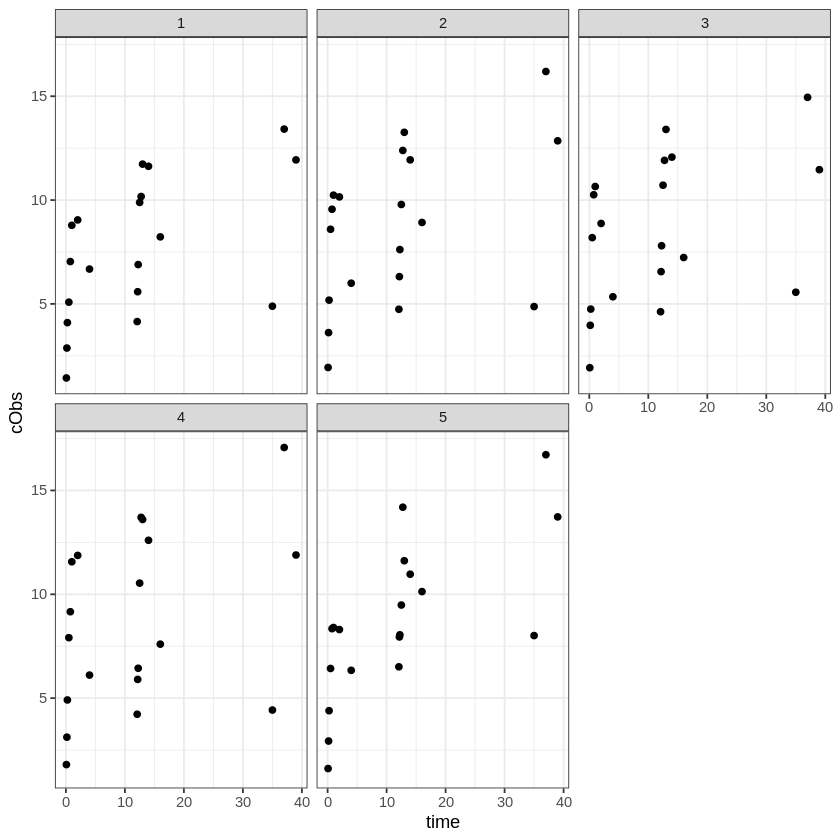

In [9]:
# plot data
patientID <- rep(NA, data$nSubjects)
for (i in 1:data$nSubjects) {
  patientID[data$start[i]:data$end[i]] <- i
}

p <- ggplot(data = data.frame(cObs = data$cObs, time = data$time[data$iObs],
                              ID = patientID[data$iObs]), aes(x = time, y = cObs)) +
  theme_bw() + geom_point() + facet_wrap(~ID)
p

In [10]:
# Draw initial points from the prior
init <- function () {
  n_subjects <- data$nSubjects
  pop_var <- c(0.2, 0.2, 0.2, 0.2, 0.2)

  CL_pop <- exp(rnorm(1, log(10), pop_var[1]))
  Q_pop <- exp(rnorm(1, log(15), pop_var[2]))
  VC_pop <- exp(rnorm(1, log(35), pop_var[3]))
  VP_pop <- exp(rnorm(1, log(105), pop_var[4]))
  ka_pop <- exp(rnorm(1, log(2.5), pop_var[5]))
  omega <- abs(rnorm(5, 0, pop_var))

  theta_pop <- c(CL_pop, Q_pop, VC_pop, VP_pop, ka_pop)
  theta <- matrix(NA, n_subjects, length(theta_pop))
  for (j in 1:n_subjects) {
    theta[j, ] <- exp(rnorm(length(theta_pop), log(theta_pop), omega))
  }

  list(CL_pop = CL_pop, Q_pop = Q_pop, VC_pop = VC_pop, VP_pop = VP_pop,
       ka_pop = ka_pop, omega = omega, theta = theta,
       sigma = abs(rnorm(1, 0, 1)))
}


In [11]:
model_name <- "twoCptPop"
mod <- cmdstan_model(paste0("model/", model_name, ".stan"))


ERROR: ignored

In [50]:
n_chains <- 4
fit <- mod$sample(data = data, chains = n_chains, init = init,
                  parallel_chains = detectCores(),
                  iter_warmup = 500, iter_sampling = 500,
                  seed = 1234, adapt_delta = 0.8)

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: eta
 - chain 2: eta
 - chain 3: eta
 - chain 4: eta




Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: PMXTwoCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: PMXTwoCptModel: CL is 0, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warnin

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: PMXTwoCptModel: Q is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: PMXTwoCptModel: V2 is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 172.9 seconds.
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: PMXTwoCptModel: CL is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 186.0 seconds.
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: PMXTwoCptModel: Q is inf, but must be positive finite! (in '/tmp/RtmpBMyYdw/model-18431a55471.stan', line 54, column 4 to line 62, column 59)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in

See https://mc-stan.org/misc/warnings for details.




In [51]:
fit$save_object(paste0("deliv/", model_name, ".fit.RDS"))

In [52]:
fit$time()

$total
[1] 378.2877

$chains
  chain_id  warmup sampling   total
1        1 107.429   65.490 172.919
2        2 110.732   75.290 186.022
3        3 118.253   72.539 190.792
4        4 122.652   69.390 192.042

variable mean         median      sd           mad          q5         
1 lp__      89.17737100  89.5202500  5.296247722  5.274868410 79.94258500
2 CL_pop     9.96235801   9.9226450  0.840885850  0.776519163  8.63371600
3 Q_pop     26.84601900  26.6016000  4.028605269  3.835708590 20.57262500
4 VC_pop    42.45768420  41.8180000  6.463769282  6.213650730 32.82727500
5 VP_pop   116.15089755 114.7050000 14.321436561 13.893444600 95.17092500
6 ka_pop     0.82505388   0.8171040  0.126092454  0.124190730  0.64081130
7 sigma      0.06630171   0.0659512  0.005553412  0.005479467  0.05814001
  q95          rhat     ess_bulk  ess_tail 
1  97.13346500 1.010736  399.7965 1008.6796
2  11.36522500 1.000303 1126.5700 1307.6748
3  33.78559500 1.003354  970.3524  892.6707
4  53.81761500 1.002159 1432.7098 1011.8662
5 141.10755000 1.002864 1463.9898 1286.2362
6   1.03756850 1.000972 1413.4441  907.4859
7   0.07595155 1.001230 1568.6546 1339.8582

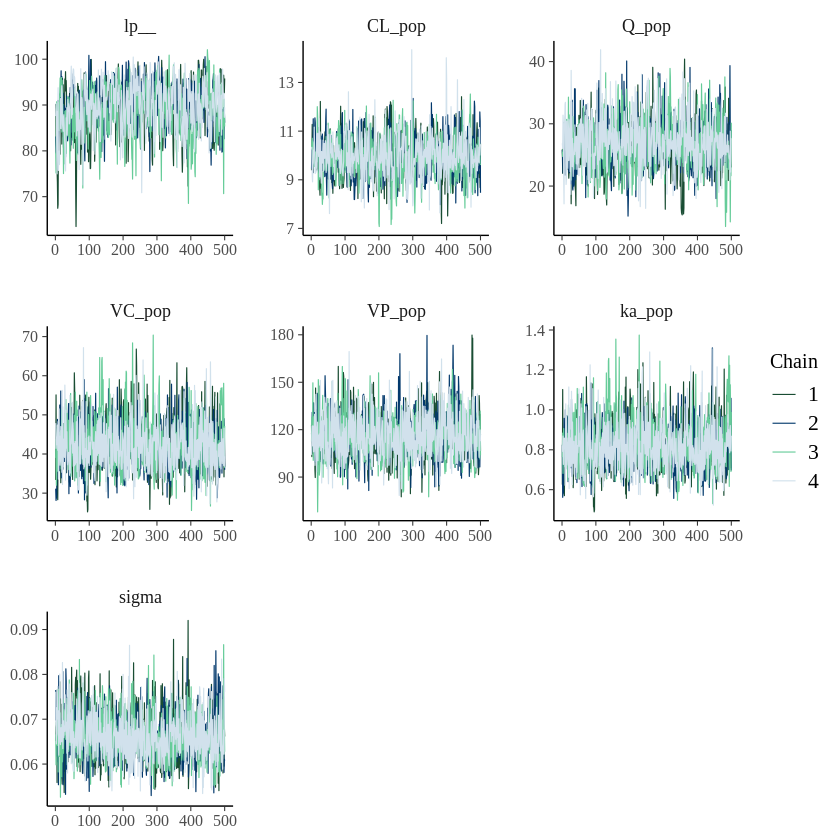

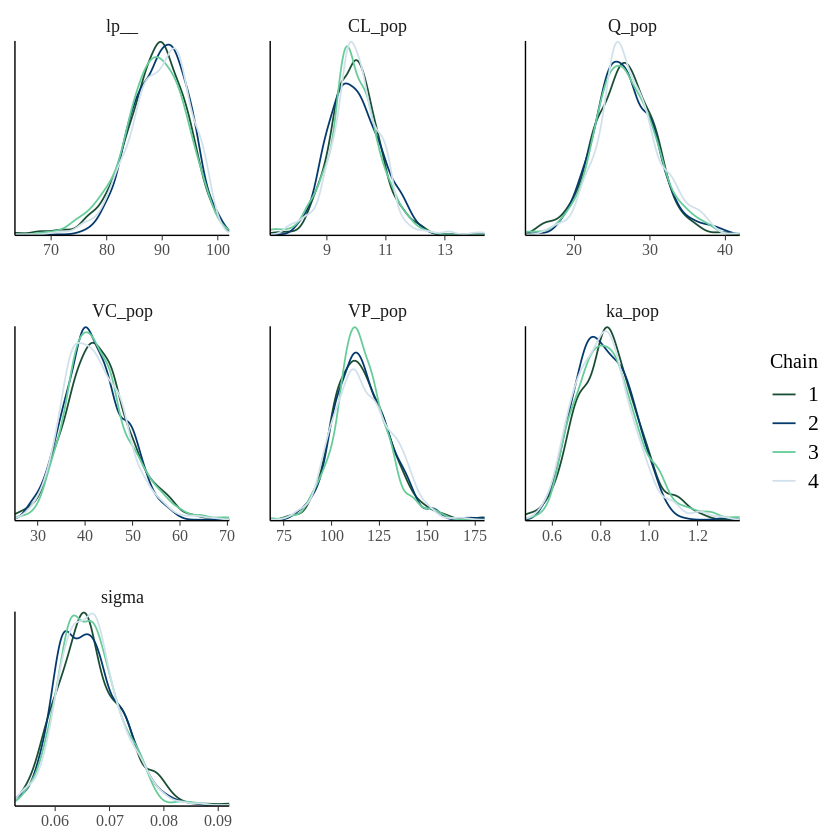

In [53]:
pars = c("lp__", "CL_pop", "Q_pop", "VC_pop", "VP_pop", "ka_pop", "sigma")
fit$summary(variables = pars)
bayesplot::mcmc_trace(fit$draws(), pars = pars)
bayesplot::mcmc_dens_overlay(fit$draws(), pars = pars)

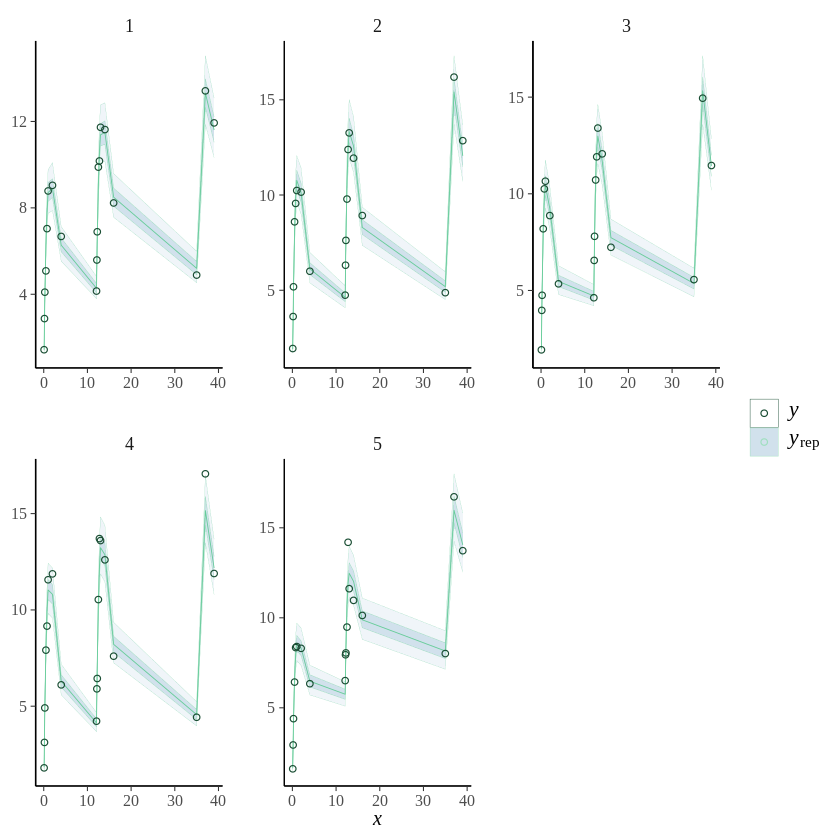

In [54]:
# posterior predictive checks
yrep <- as.matrix(
  as_draws_df(
    fit$draws(variables = c("concentrationObsPred"))))
yrep <- yrep[, -((ncol(yrep) - 2):ncol(yrep))]

yobs <- data$cObs
time <- data$time[data$iObs]
patientID <- with(data, rep(1:nSubjects, each = nObs / nSubjects))

# within patient predictions
bayesplot::ppc_ribbon_grouped(y = yobs, yrep = yrep, x = time, patientID,
                              y_draw = "point")

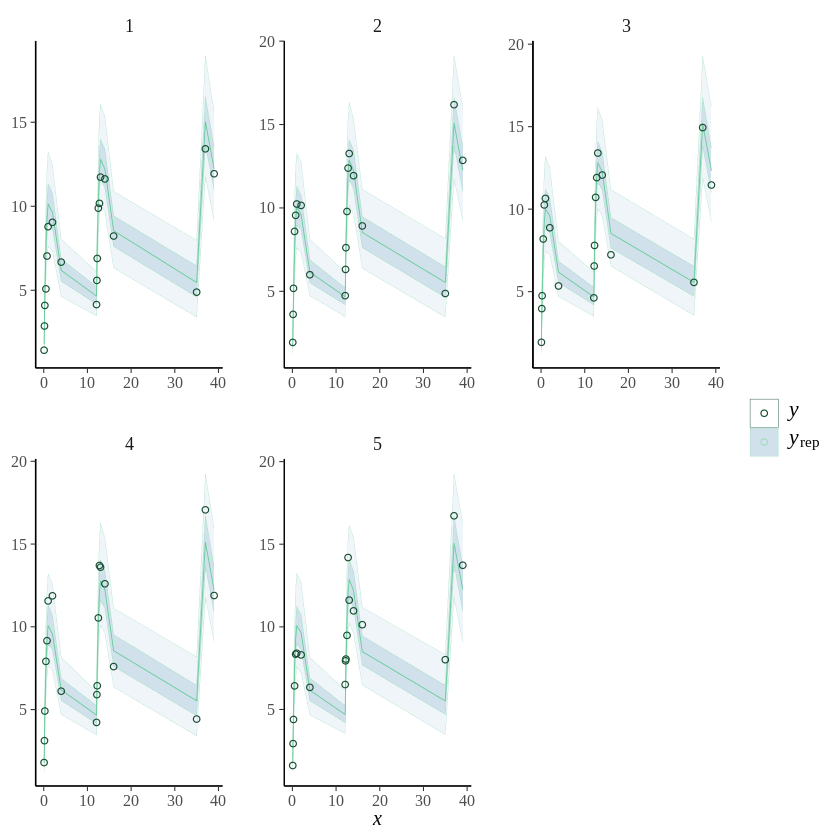

In [55]:
# predictions for new patient
yrepNew <- as.matrix(
  as_draws_df(
    fit$draws(variables = c("cObsNewPred"))))
yrepNew <- yrepNew[, -((ncol(yrepNew) - 2):ncol(yrepNew))]

bayesplot::ppc_ribbon_grouped(y = yobs, yrep = yrepNew, x = time, patientID,
                              y_draw = "point")

In [12]:
# Implementation with multiple threads per chain
model_name <- "twoCptPop_rs"
mod <- cmdstan_model(paste0("model/", model_name, ".stan"),
                     cpp_options = list(stan_threads = TRUE))


In file included from stan/lib/stan_math/lib/boost_1.75.0/boost/concept/assert.hpp:35,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/concept_check.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/concepts.hpp:19,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/size_type.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/size.hpp:21,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/functions.hpp:20,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/range/iterator_range_core.hpp:38,
                 from stan/lib/stan_math/lib/boost_1.75.0/boost/lexical_cast.hpp:30,
                 from stan/src/stan/callbacks/writer.hpp:4,
                 from src/cmdstan/arguments/argument.hpp:4,
                 from src/cmdstan/arguments/categorical_argument.hpp:4,
                 from src/cmdstan/arguments/arg_data.hpp:4,
                 from src/cmdstan/command.hpp:

In [16]:
n_chains <- 1
fit_rs <- mod$sample(data = data, chains = n_chains, init = init,
                     parallel_chains = n_chains,
                     threads_per_chain = 1,
                     iter_warmup = 500, iter_sampling = 500,
                     seed = 123, adapt_delta = 0.8)

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
eta




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: Exception: lognormal_lpdf: Location parameter[1] is -nan, but must be finite! (in '/tmp/RtmpfsOUHi/model-1086535c47d.stan', line 65, column 4 to column 69) (in '/tmp/RtmpfsOUHi/model-1086535c47d.stan', line 136, column 2 to line 139, column 65)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: Exception: PMXTwoCptModel: CL is -nan, but must be positive finite! (in '/tmp/RtmpfsOUHi/model-1086535c47d.stan', line 41, column 6 to line 50, column 39) (in '/tmp/RtmpfsOUHi/model-1086535c47d.stan', line 13

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 98.1 seconds.


In [17]:
fit_rs$time()
# fit_rs$summary(variables = pars)

$total
[1] 98.23375

$chains
  chain_id warmup sampling  total
1        1 58.086   40.031 98.117